In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## CS/Stat 118 F21 Lecture 6 ##


## Functions ##
### Functions are one of the most powerful concepts in programming languages.   By defining functions you get to augment the programming language, effectively creating commands that are tailored to your task.   Functions allow you to raise the level of abstraction at which you program.###

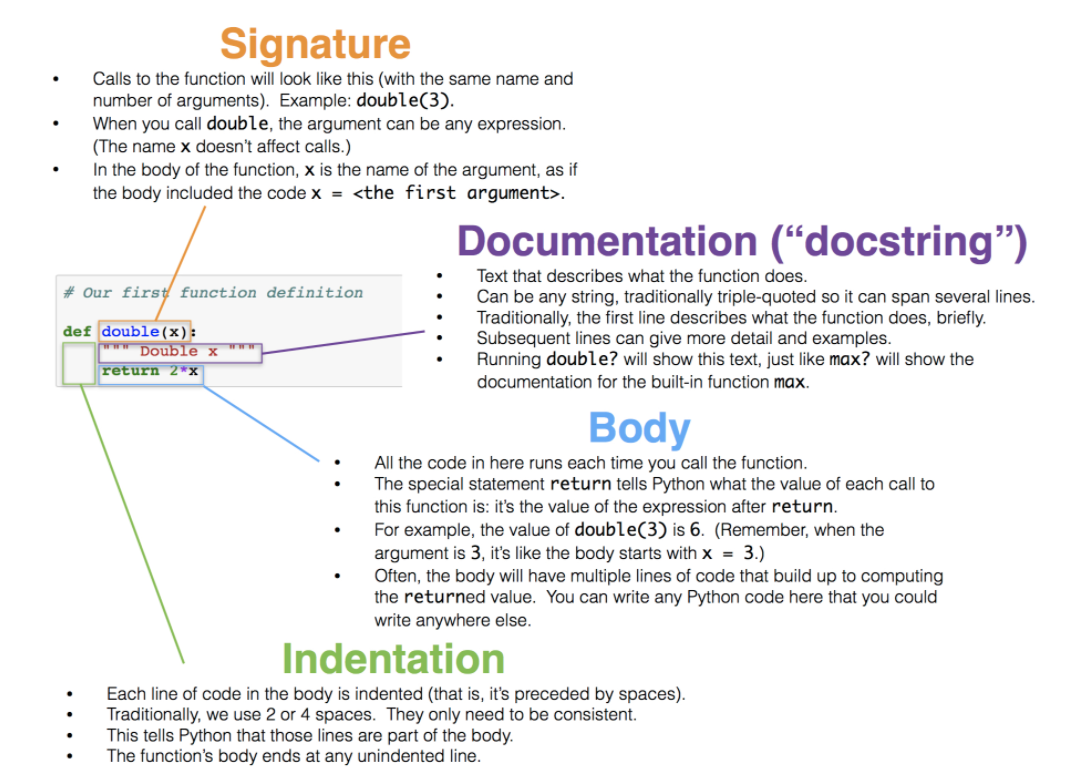

### You've used built-in functions, you can also define your own!

In [ ]:
#Define a function that doubles things!
#Note, the indentation matters

def double(foo):
    """This is an amazing function that doubles stuff"""
    return foo * 2

### We haven't really computed anything yet, we've just **defined** the new function

### Now, let's run it!

In [ ]:
#called with an int
double(10)

In [ ]:
#called with a float
double(10.0)

In [ ]:
#you can even call it with a string
double('nom ')

In [ ]:
#you can use it to double the result of an expression
number = 10
number = double(number)
number

In [ ]:
#called with an array
double(np.array([1,2,3]))

### Name Scoping

In [ ]:
#indentation matters in python!!!!
def percents(values):
    proportion = values/sum(values)
    return np.round(proportion * 100,decimals=2)

In [ ]:
percents(np.array([1, 2, 3, 4]))

In [ ]:
percents(np.array([1, 2, 3, 43]))

In [ ]:
#Important: variables defined inside functions are not visible outside the function
#This is called "scoping" in programming languages
proportion

In [ ]:
#In fact, you can reuse the name outside of the function and it is a different variable
proportion = "Hi, I'm a string!"

print(percents(np.array([10, 20, 30])))
print(proportion)

### Arguments (the parameters that the function takes)

In [ ]:
#can make more flexible, parameterize the rounding 

def new_percents(values, places):
    proportion = values/sum(values)
    return np.round(proportion * 100, places)

In [ ]:
new_percents(np.array([1,2,3,43]),1)

In [ ]:
#Note: the function as written *requires* two arguments
new_percents(np.array([1,2,3,43]))

#### Can make arguments optional by providing **default** values

In [ ]:
#can make places an optional argument
def new_percents(values, places = 2):
    proportion = values/sum(values)
    return np.round(proportion * 100, places)

In [ ]:
#now the function can take one or two arguments
#with two arguments, it works as before
my_array = np.array([1,2,3,43])
new_percents(my_array,4)

In [ ]:
#But if you give only one, it uses the default for the second
new_percents(my_array)

In [ ]:
#note you can reorder arguments by being explicit in the call
#this is also useful if you have multiple optional arguments
new_percents(places=3, values=my_array)

## Apply - Using functions with DataFrames in Pandas ##

In [ ]:
ages = pd.DataFrame(
    {'Person': np.array(['A', 'B', 'C', 'D']),
    'Age': np.array([63, 101, 99, 102])}
)

In [ ]:
ages

In [ ]:
#Let's define a function that replaces any numbers greater than 100 with 100
#Remember, this was done in the census data we used a few classes back...
def cut_off(age):
    return min(age, 100)

In [ ]:
cut_off(70)

In [ ]:
#Here's an example using "apply()" on a single column
#you provide the function name and the column on which to apply the function
#apply() returns a Series
ages.Age.apply(cut_off)

In [ ]:
#if you want to augment the table you need to do so explicitly
ages['AgeCutoff'] = ages.Age.apply(cut_off)
ages

### When applying functions to dataframes it is sometimes useful to use "anonymous" (unnamed) functions.   These are called "lambda functions".

In [ ]:
#Here's the above example done with a lambda function
ages.Age.apply(lambda x: min(x,100))

### In the above example, the "x" variable is bound to each value in the "Age" column.   We can also have the variable bind to entire rows.  This is useful when your functions need to access multiple columns.

In [ ]:
#Note that we have to use axis="columns" (or axis = 1) so that the lambda 
#function is applied to each row.

ages['NewDiff'] = ages.apply(lambda x: x.Age - x.AgeCutoff,axis="columns")
ages

### Description of "axis" from the python documentation 
#### (seems a bit counter-intuitive to me!)
<br>
<br>
<div>
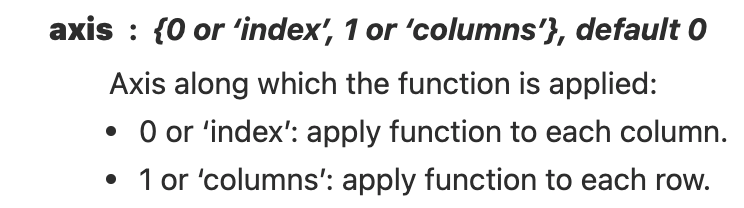
</div>


### One other counter-intuitive Pandas feature

In [ ]:
a = 10
b = a
a = 20
print("a = ", a, "b =", b)

In [ ]:
id(a) == id(b)

### With structured objects, Python assigns the reference, not the value

In [ ]:
lista = [1,2,3]
listb = lista
id(lista) == id(listb)

### Now try it with Dataframes

In [ ]:
dfa = pd.DataFrame(
    {'Person': np.array(['A', 'B', 'C', 'D']),
    'Age': np.array([63, 101, 99, 102])}
)
dfb = dfa

In [ ]:
id(dfa) == id(dfb)

## With the dataframe (unlike the int) the new variable points to the same object as the original.   If you want a new copy you need to use "copy()"